In [94]:
import pandas as pd
df = pd.read_csv('data/classification6.csv')
df

,Model,BACE,BBBP,Tox21,ToxCast,SIDER,ClinTox,Avg
0,GraphSAGE,72.70,67.70,69.9,59.1,58.3,52.10,63.300000
1,GPT GNN,72.50,69.30,73.1,59.8,59.6,60.40,65.783333
2,AttributeMask,80.10,65.90,74.6,63.7,58.2,74.00,69.416667
3,ContextPred,77.70,68.60,72.7,62.1,58.8,71.10,67.660000
4,InfoGraph,76.60,68.80,74.7,60.8,56.7,72.90,68.416667
5,MoCL,75.10,66.80,70.9,60.7,61.2,60.80,65.916667
6,GraphLoG,79.00,65.70,73.4,63.4,57.3,72.50,68.550000
7,GraphCL,72.80,69.50,75,63.2,61.4,78.90,71.520000
8,JOAO,72.20,70.70,75.5,61.6,61.1,79.60,71.820000
9,MolCLR,76.50,69.30,74.2,55,56.4,90.40,70.300000


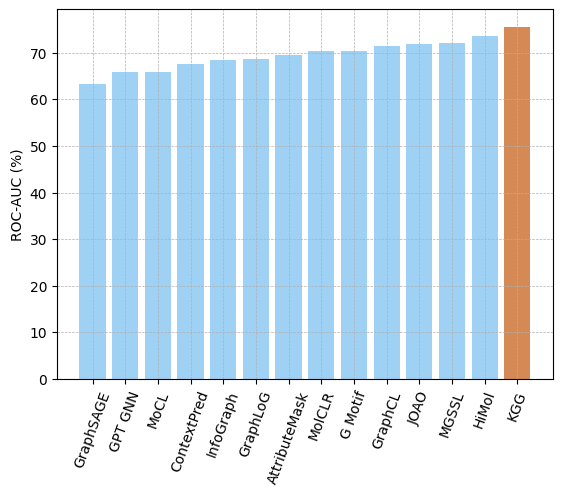

In [95]:
import matplotlib.pyplot as plt
df = df.sort_values('Avg')

# Creating a color array
colors = ['#9FD1F5' if model != 'KGG' else '#D58A55' for model in df.Model]

# Plotting with custom color
plt.bar(df.Model, df['Avg'], color=colors)

# Customizing the plot
plt.ylabel('ROC-AUC (%)')

# Adding a grid with custom size and weight
plt.grid(True, linewidth=0.5, linestyle='--')

# Rotating x-axis labels
plt.xticks(rotation=70)
plt.savefig('fig/avg_classification6.png', dpi=600, bbox_inches='tight')
# Displaying the plot
plt.show()

In [96]:
df_std = pd.read_excel('data/classification_std.xlsx')
df_std

,Model,BACE,BBBP,Tox21,ToxCast,SIDER,ClinTox,Avg
0,GraphSAGE,72.7 ± 3.3,67.7 ± 2.8,69.9 ± 1.1,59.1 ± 0.3,58.3 ± 0.2,52.1 ± 5.5,63.3
1,GPT GNN,72.5 ± 0.8,69.3 ± 1.3,73.1 ± 0.7,59.8 ± 0.4,59.6 ± 3.5,60.4 ± 3.3,65.8
2,AttributeMask,80.1 ± 0.4,65.9 ± 1.3,74.6 ± 0.3,63.7 ± 0.4,58.2 ± 0.6,74.0 ± 2.3,69.4
3,ContextPred,77.7 ± 1.3,68.6 ± 0.9,72.7 ± 0.6,62.1 ± 0.4,58.8 ± 1.1,71.1 ± 3.6,67.7
4,InfoGraph,76.6 ± 1.8,68.8 ± 0.7,74.7 ± 0.4,60.8 ± 0.8,56.7 ± 0.9,72.9 ± 4.7,68.4
5,MoCL,75.1 ± 0.1,66.8 ± 0.1,70.9 ± 0.2,60.7 ± 0.1,61.2 ± 0.1,60.8 ± 0.1,65.9
6,GraphLoG,79.0 ± 0.7,65.7 ± 1.4,73.4 ± 0.3,63.4 ± 0.4,57.3 ± 2.3,72.5 ± 1.8,68.6
7,GraphCL,72.8 ± 5.4,69.5 ± 2.6,75.0 ± 0.3,63.2 ± 0.4,61.4 ± 1.3,78.9 ± 4.2,71.5
8,JOAO,72.2 ± 2.0,70.7 ± 0.6,75.5 ± 0.7,61.6 ± 0.6,61.1 ± 0.9,79.6 ± 3.7,71.8
9,MolCLR,76.5 ± 0.5,69.3 ± 0.5,74.2 ± 0.8,55.0 ± 1.3,56.4 ± 0.3,90.4 ± 1.7,70.3


In [97]:
# Splitting the 'ROC-AUC' column into 'value' and 'std' columns
for column in df_std.drop(["Model", "Avg"], axis=1).columns:
    df_std[[column, column + 'std']] = df_std[column].str.split('±', expand=True)

In [98]:
df_std

,Model,BACE,BBBP,Tox21,ToxCast,SIDER,ClinTox,Avg,BACEstd,BBBPstd,Tox21std,ToxCaststd,SIDERstd,ClinToxstd
0,GraphSAGE,72.7,67.7,69.9,59.1,58.3,52.1,63.3,3.3,2.8,1.1,0.3,0.2,5.5
1,GPT GNN,72.5,69.3,73.1,59.8,59.6,60.4,65.8,0.8,1.3,0.7,0.4,3.5,3.3
2,AttributeMask,80.1,65.9,74.6,63.7,58.2,74.0,69.4,0.4,1.3,0.3,0.4,0.6,2.3
3,ContextPred,77.7,68.6,72.7,62.1,58.8,71.1,67.7,1.3,0.9,0.6,0.4,1.1,3.6
4,InfoGraph,76.6,68.8,74.7,60.8,56.7,72.9,68.4,1.8,0.7,0.4,0.8,0.9,4.7
5,MoCL,75.1,66.8,70.9,60.7,61.2,60.8,65.9,0.1,0.1,0.2,0.1,0.1,0.1
6,GraphLoG,79.0,65.7,73.4,63.4,57.3,72.5,68.6,0.7,1.4,0.3,0.4,2.3,1.8
7,GraphCL,72.8,69.5,75.0,63.2,61.4,78.9,71.5,5.4,2.6,0.3,0.4,1.3,4.2
8,JOAO,72.2,70.7,75.5,61.6,61.1,79.6,71.8,2.0,0.6,0.7,0.6,0.9,3.7
9,MolCLR,76.5,69.3,74.2,55.0,56.4,90.4,70.3,0.5,0.5,0.8,1.3,0.3,1.7


In [99]:
# Defining a function to remove the non-breaking space and convert to float
def convert_value(value):
    if type(value) is not float:
        return float(value.replace('\u2009', ''))
    else:
        return value
df_rm_model = df_std.drop("Model", axis=1)
# Applying the function to all values in the DataFrame
df_float = df_rm_model.applymap(convert_value)

df_std_new = pd.concat([df_std['Model'], df_float], axis=1)
df_std_new.to_csv('data/classification_std.csv', index=False)

/tmp/ipykernel_155929/4134338265.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_float = df_rm_model.applymap(convert_value)


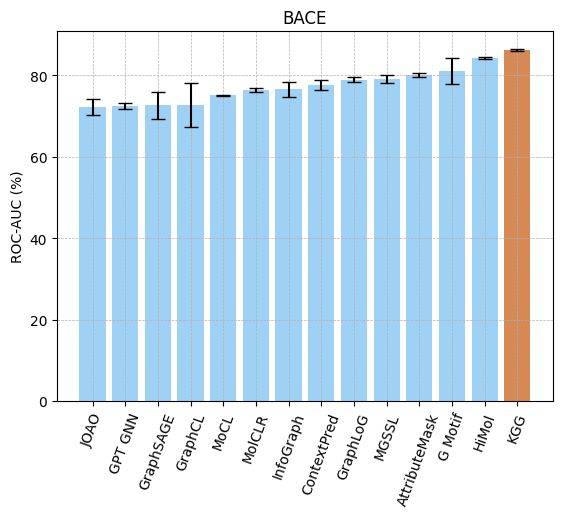

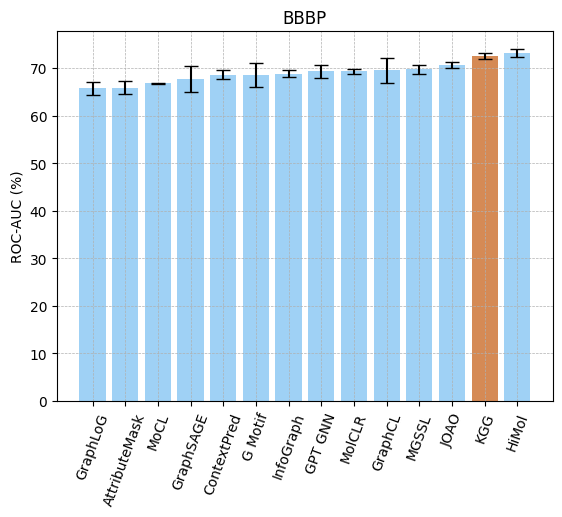

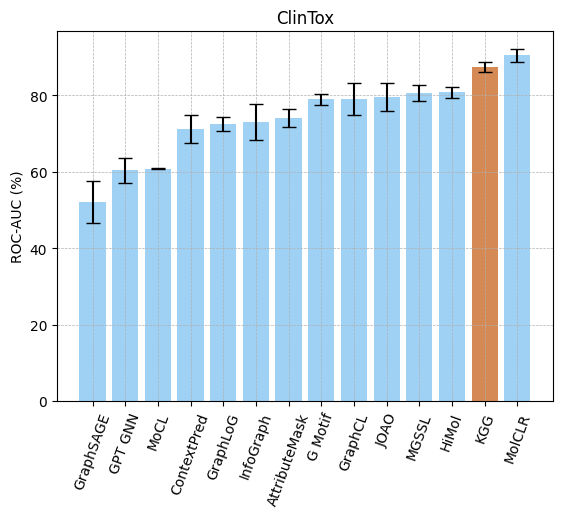

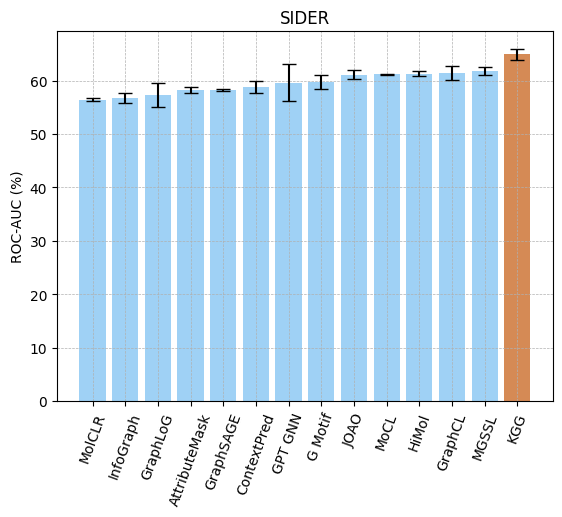

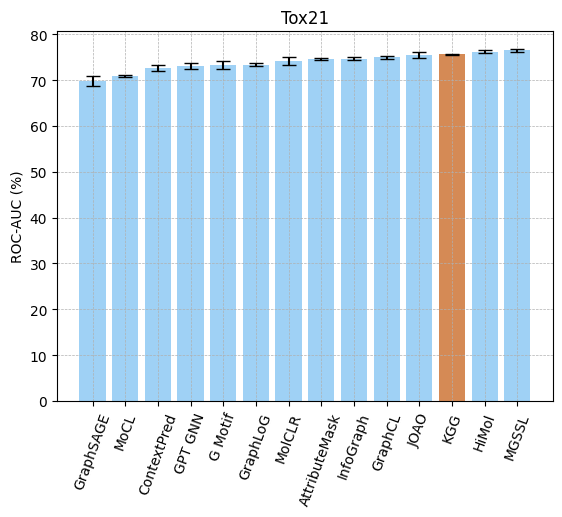

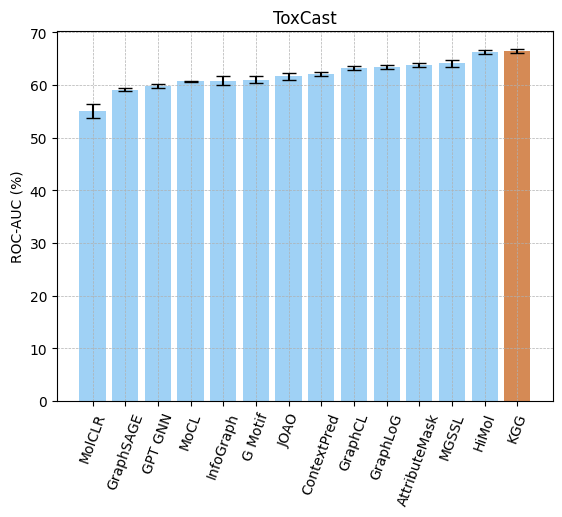

In [101]:
import matplotlib.pyplot as plt
for dataset in ["BACE", "BBBP", "ClinTox", "SIDER", "Tox21", "ToxCast"]:
    df_std_new = df_std_new.sort_values(dataset)

    # Creating a color array
    colors = ['#9FD1F5' if model != 'KGG' else '#D58A55' for model in df_std_new.Model]

    # Assuming 'df_std_T' is your DataFrame and it has an 'avg' column for average values
    # and a 'std' column for standard deviation values
    # Plotting
    plt.bar(df_std_new.Model, df_std_new[dataset], yerr=df_std_new[f'{dataset}std'], capsize=5, color=colors)

    # Customizing the plot
    plt.title(f'{dataset}')
    plt.ylabel('ROC-AUC (%)')

    # Adding a grid with custom size and weight
    plt.grid(True, linewidth=0.5, linestyle='--')

    # Rotating x-axis labels
    plt.xticks(rotation=70)
    plt.savefig(f'fig/std_{dataset}.png', dpi=600, bbox_inches='tight')
    # Displaying the plot
    plt.show()